#### The Idea

- "Unlike some of the problems we’ve looked at, there is generally no 'correct' clustering."
    - "Neither scheme is necessarily more correct — instead, each is likely more optimal with respect to its own 'how good are the clusters?' metric."
- "Furthermore, the clusters won’t label themselves. You’ll have to do that by looking at the data underlying each one."

#### The model

- "each input will be a vector in d-dimensional space"
- "Our goal will be to identify clusters of similar inputs and (sometimes) to find a representative value for each cluster."
    - "For example, each input could be (a numeric vector that somehow represents) the title of a blog post, in which case the goal might be to find clusters of similar posts, perhaps in order to understand what our users are blogging about."

"One of the simplest clustering methods is $k$-means, in which the number of clusters $k$ is chosen in advance, after which the goal is to partition the inputs into sets $S_1 , ..., S_k$ in a way that minimizes the total sum of squared distances from each point to the
mean of its assigned cluster."

"There are a lot of ways to assign $n$ points to $k$ clusters, which means that finding an optimal clustering is a very hard problem. We’ll settle for an iterative algorithm that usually finds a good clustering:"

1. "Start with a set of $k$-means, which are points in $d$-dimensional space."
2. "Assign each point to the mean to which it is closest."
3. "If no point’s assignment has changed, stop and keep the clusters."
4. "If some point’s assignment has changed, recompute the means and return to step 2."

In [1]:
def vector_add(v, w):
    """
    adds corresponding elements
    """
    return [v_i + w_i
            for v_i, w_i in zip(v, w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    """
    c is a number, v is a vector
    """
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """
    compute the vector whose ith element is the mean 
    of the ith elements of the input vectors
    """
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [3]:
class KMeans:
    """
    performs k-means clustering
    """
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters

def classify(self, input):
    """
    return the index of the cluster closest to the input
    """
    return min(range(self.k),
               key=lambda i: squared_distance(input, self.means[i]))

def train(self, inputs):
    # choose k random points as the initial means
    self.means = random.sample(inputs, self.k)
    assignments = None

    while True:
        # Find new assignments
        new_assignments = map(self.classify, inputs)
        # If no assignments have changed, we're done.
        if assignments == new_assignments:
            return

        # Otherwise keep the new assignments,
        assignments = new_assignments

        # And compute new means based on the new assignments
        for i in range(self.k):
            # find all the points assigned to cluster i
            i_points = [p for p, a in zip(inputs, assignments) 
                        if a == i]
            # make sure i_points is not empty so don't divide by 0
            if i_points:
                self.means[i] = vector_mean(i_points)

#### Choosing $k$

"There is a wide variety of ways to choose a k. One
that’s reasonably easy to understand involves plotting the sum of squared errors (between each point and the mean of its cluster) as a function of k and looking at where the graph “bends”:"

In [4]:
def squared_clustering_errors(inputs, k):
    """
    finds the total squared error from k-means clustering the inputs
    """
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

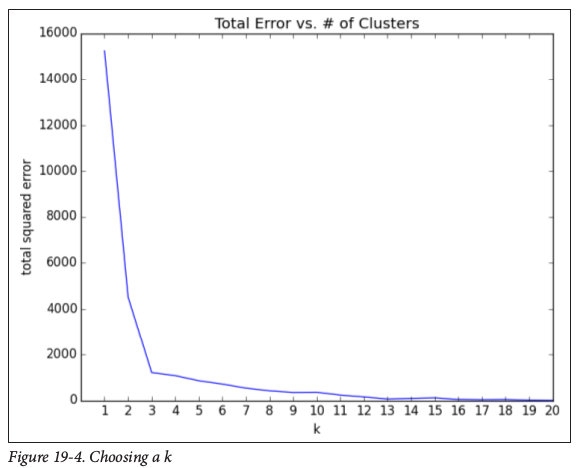

In [5]:
from IPython.display import Image
Image('choosing-k.png')

"this method agrees with our original eyeballing that 3 is the
'right' number of clusters."

#### Bottom-up Hierarchical Clustering

"An alternative approach to clustering is to “grow” clusters from the bottom up. We can do this in the following way:"

1. "Make each input its own cluster of one."
2. "As long as there are multiple clusters remaining, find the two closest clusters and merge them."

"At the end, we’ll have one giant cluster containing all the inputs. If we keep track of the merge order, we can recreate any number of clusters by unmerging. For example, if we want three clusters, we can just undo the last two merges."